# Gamestop

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import numpy as np
import matplotlib.ticker as tick

In [2]:
# url = 'https://cloud.iexapis.com/stable/stock/GME/financials/5?token=sk_a6ef19bab2c5459093f4aaac416b6219&period=annual'
url = 'https://cloud.iexapis.com/stable/stock/GME/'
token = 'sk_a6ef19bab2c5459093f4aaac416b6219'
query_url = url + 'financials/5?token=' + token + '&period=annual'
print(requests.get(query_url))

<Response [200]>


## GameStop Financials

In [3]:
response = requests.get(query_url)
gme = response.json()

In [5]:
financials = gme['financials']
financials_df = pd.DataFrame(financials, columns=['date','EBITDA','totalCash','totalDebt', 'grossProfit',
                                                  'cashFlow','commonStock', 'totalAssets', 
                                                 'totalInvestingCashFlows', 'totalLiabilities','totalRevenue'])

financials_df['date'] = pd.to_datetime(financials_df['date'], unit='ms')

# Add year column
financials_df['Year'] = financials_df['date'].dt.year

financials_df = financials_df.rename(columns={'date': 'Date',
                                              'totalCash': 'Total Cash',
                                              'totalDebt': 'Total Debt',
                                              'totalRevenue':'Total Revenue',
                                              'grossProfit': 'Gross Profit',
                                              'cashFlow': 'Cash Flow',
                                              'commonStock': 'Common Stock',
                                              'totalAssets': 'Total Assets',
                                              'totalInvestingCashFlows': 'Total Investment Cash Flow',
                                              'totalLiabilities': 'Total Liabilities',
                                              }).set_index('Date')

financials_df.style.format({
    'EBITDA': "${:,.2f}",
    'Total Cash': "${:,.2f}",
    'Total Debt': "${:,.2f}",
    'Total Revenue': "${:,.2f}",
    'Gross Profit': "${:,.2f}",
    'Cash Flow': "${:,.2f}",
    'Common Stock': "${:,.2f}",
    'Total Assets': "${:,.2f}",
    'Total Investment Cash Flow': "${:,.2f}",
    'Total Liabilities': "${:,.2f}"})

,EBITDA,Total Cash,Total Debt,Gross Profit,Cash Flow,Common Stock,Total Assets,Total Investment Cash Flow,Total Liabilities,Total Revenue,Year
Date,,,,,,,,,,,
2020-02-01 00:00:00,"$82,200,000.00","$499,400,000.00","$419,800,000.00","$1,908,700,000.00","$414,500,000.00","$87,500,000.00","$2,819,700,000.00","$-60,900,000.00","$2,208,200,000.00","$6,466,000,000.00",2020
2019-02-02 00:00:00,"$419,500,000.00","$1,624,400,000.00","$820,800,000.00","$2,308,100,000.00","$325,100,000.00","$102,100,000.00","$4,044,300,000.00","$635,500,000.00","$2,708,100,000.00","$8,285,300,000.00",2019
2018-02-03 00:00:00,"$677,100,000.00","$864,400,000.00","$817,900,000.00","$3,040,100,000.00","$434,900,000.00","$101,400,000.00","$5,041,600,000.00","$-63,700,000.00","$2,827,100,000.00","$9,224,600,000.00",2018
2017-01-28 00:00:00,"$756,700,000.00","$669,400,000.00","$815,000,000.00","$3,009,300,000.00","$537,100,000.00","$103,400,000.00","$4,975,900,000.00","$-578,000,000.00","$2,721,800,000.00","$8,607,900,000.00",2017
2016-01-30 00:00:00,"$809,400,000.00","$450,400,000.00","$350,400,000.00","$2,918,300,000.00","$656,800,000.00","$106,000,000.00","$4,334,900,000.00","$-444,600,000.00","$2,253,900,000.00","$9,363,800,000.00",2016


In [ ]:
pd.DataFrame(financials)

In [ ]:
#Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).

def reformat_large_tick_values(tick_val, pos):

    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

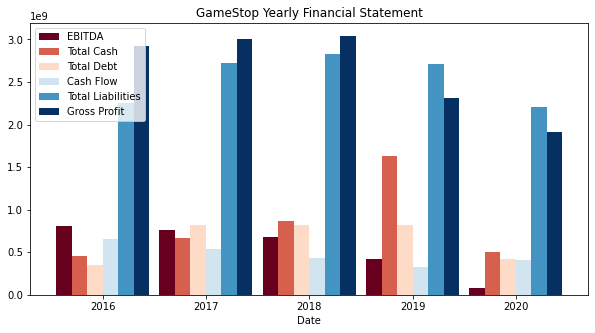

In [23]:
# Sort values by year
financials_df = financials_df.sort_values(by='Year')


columns = financials_df[['EBITDA','Total Cash','Total Debt','Cash Flow', 'Total Liabilities','Gross Profit']]

ax = columns.plot.bar(figsize=(10,5), colormap="RdBu", title="GameStop Yearly Financial Statement",
                width=.9)



tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, financials_df['Year'])
plt.xticks(rotation = 0)

ax.legend(loc=2)  
#plt.ylabel('size in meters')
#plt.xlabel('time in seconds')
plt.show()

In [ ]:
columns

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='black')

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)


financials_df['EBITDA'].plot()
financials_df['Total Cash'].plot()
financials_df['Total Debt'].plot()
financials_df['Gross Profit'].plot()
financials_df['Cash Flow'].plot()


ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,
          fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set_facecolor('black')


plt.title("GameStop Yearly Financial Statement", fontsize=22, color='white')
plt.grid(color='lightslategrey', linestyle='--', alpha=0.3)
plt.xlabel('Date', fontsize=15)
plt.show()

## Gamestop Stock Statistics

In [ ]:
stat_query_url = url + '/stats?token=' + token
print(requests.get(stat_query_url))

In [ ]:
response = requests.get(stat_query_url)
gme_stat = response.json()
gme_stats_df = pd.DataFrame([gme_stat]).set_index('companyName').drop(columns=['float', 'employees', 'ttmDividendRate',
                                                                              'dividendYield','nextDividendDate', 'exDividendDate',
                                                                              'nextEarningsDate'])
gme_stats_df

## Gamestop Largest Trades

In [ ]:
trade_query_url = url + '/largest-trades?token=' + token
print(requests.get(trade_query_url))

In [ ]:
response = requests.get(trade_query_url)
gme_trade = response.json()
pd.DataFrame(gme_trade)

## GameStop Halt

In [ ]:
halt_query_url = 'https://cloud.iexapis.com/stable/stats/op-halt-status?symbols=GME&token=' + token
print(requests.get(halt_query_url))

In [ ]:
response = requests.get(halt_query_url)
gme_halt = response.json()
pd.DataFrame(gme_halt)